# Logistic Regression
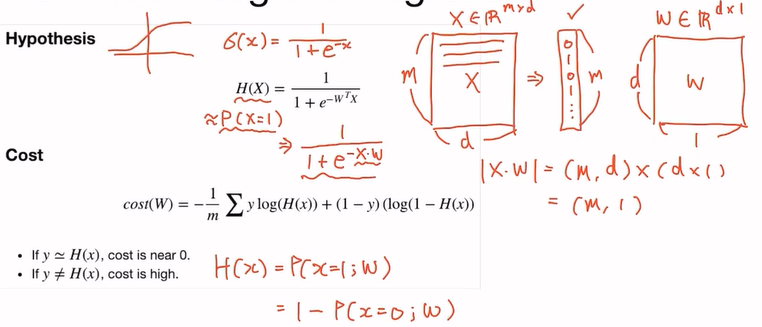
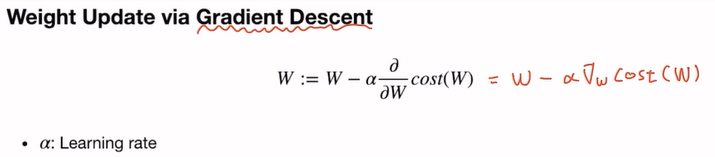

# Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

# Training Data

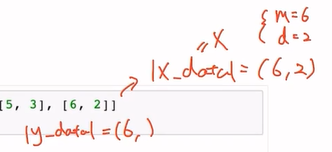

In [3]:
x_data=[[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data=[[0], [0], [0], [1], [1], [1]]

In [4]:
x_train=torch.FloatTensor(x_data)
y_train=torch.FloatTensor(y_data)

In [5]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


# Computing the Hypothesis
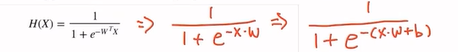

- `torch.exp()`

In [6]:
print('e^1 equals: ', torch.exp(torch.FloatTensor([1])))

e^1 equals:  tensor([2.7183])


In [7]:
W=torch.zeros((2,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)

In [8]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [9]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


- `torch.sigmoid()`

In [10]:
print('1/(1+e^{-1}) equals: ', torch.sigmoid(torch.FloatTensor([1])))

1/(1+e^{-1}) equals:  tensor([0.7311])


In [11]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [12]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
torch.Size([6, 1])


# Computing the Cost Function
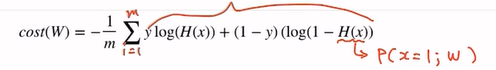

In [14]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


하나의 요소에 대한 loss

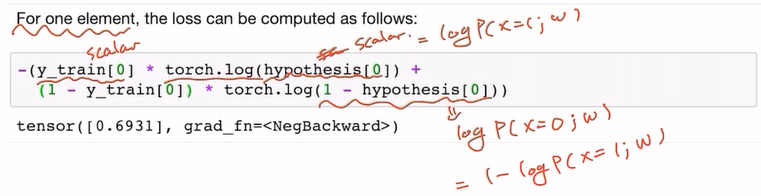

In [15]:
-(y_train[0] * torch.log(hypothesis[0]) +
   (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

전체 losses

In [16]:
losses = -(y_train * torch.log(hypothesis) +
            (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


개별 losses의 평균 구하기
- `.mean()`

In [17]:
cost=losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


아래 한 줄로 위 과정의 결과를 구할 수 있음

In [19]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

# Whole Training Procedure

In [ ]:
## 에러? 무엇?

In [26]:
# 모델 초기화
W=torch.zeros((2,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer=optim.SGD([W, b], lr=1)

nb_epochs=1000
for epoch in range(nb_epochs+1):
    # cost 계산
    hypothsis=torch.sigmoid(x_train.matmul(W) + b) # or .mmo or @
    cost=F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
        ))

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

# Evaluation

1일 확률

In [23]:
hypothesis=torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis[:5])

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SliceBackward0>)


0인지 1인지

In [27]:
prediction = hypothsis >= torch.FloatTensor([0.5])
print(prediction[:5])

tensor([[True],
        [True],
        [True],
        [True],
        [True]])


예측과 실제 비교

In [28]:
print(prediction[:5]) # 예측
print(y_train[:5]) # 실제

tensor([[True],
        [True],
        [True],
        [True],
        [True]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [29]:
correct_prediction=prediction.float()==y_train # 예측=실제만 저장
print(correct_prediction[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])


# Higher Implementation with Class

In [33]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(2,1)
        self.sigmoid=nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [34]:
model=BinaryClassifier()

In [35]:
# optimizer 설정
optimizer=optim.SGD(model.parameters(), lr=1)

nb_epochs=100
for epoch in range(nb_epochs+1):
    # H(x) 계산
    hypothsis=model(x_train)
    
    # cost 계산
    cost=F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothsis >= torch.FloatTensor([0.5])
        correct_prediction=prediction.float() == y_train
        accuracy=correct_prediction.sum().item()/len(corect_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Acuracy {:2.2f}'.format(
        epoch, nb_epochs, cost.item(), accuracy * 100
        ))

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.